# Simple Linear Regression - Minimal Example

## Import libraries

In [0]:
import random
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

random.seed(321)
np.random.seed(321)

## Generate random input data to train on

In [2]:
observations = 10000

# x sample
#xs = np.linspace(0,10,10) + np.random.uniform(low = -10, high = 10, size = (observations, 1))
xs = np.random.uniform(low = -10, high = 10, size = (observations, 1))

# z sample
#zs = np.linspace(0,10,10) + np.random.uniform(-10, 10, (observations, 1))
zs = np.random.uniform(-10, 10, (observations, 1))

inputs = np.column_stack((xs, zs))
print(inputs.shape)

(10000, 2)


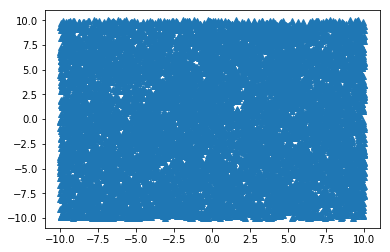

In [3]:
plt.plot(xs, zs, "^")

## Generate target

In [4]:
noise = np.random.uniform(-1, 1, (observations, 1))

# weights are 3, -5 while bias is 8
targets = 3*xs - 5*zs + 8 + noise

print(targets.shape)

(10000, 1)


## Plotting the data

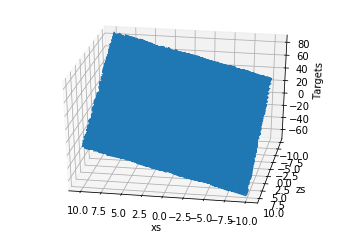

In [5]:
target_to_plot = targets.reshape(observations,)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs, zs, target_to_plot)

ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')

ax.view_init(azim=100)

plt.show()

## Initialize Weights and Biases

In [6]:
init_range = 0.1

weights = np.random.uniform(low=-init_range, high=init_range, size=(2, 1))
biases = np.random.uniform(low=-init_range, high=init_range, size=1)

print (weights)
print (biases)

[[-0.07186945]
 [-0.04340977]]
[-0.02264426]


## Train the model

In [7]:
learning_rate = 0.02

for i in range (200):
    outputs = np.dot(inputs, weights) + biases

    deltas = outputs - targets

    loss = np.sum(deltas ** 2) / 2 / observations

    print(loss)

    deltas_scaled = deltas / observations

    weights = weights - learning_rate * np.dot(inputs.T, deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)

596.1558777230925
96.73134818434026
37.39257581901636
29.41772285792448
27.4959497301052
26.324009703763306
25.277802651020824
24.282376233895594
23.327463002647505
22.410482830656385
21.529818432623937
20.684018470818426
19.871701148752322
19.091540805950142
18.342264431040963
17.622649427253254
16.93152159878948
16.267753232663644
15.630261258347163
15.018005480491643
14.429986881638772
13.865245992123674
13.322861324508578
12.801947869992247
12.301655654341513
11.821168350988762
11.359701949032242
10.91650347396587
10.490849759051065
10.082046265325953
9.689425948326482
9.312348169670255
8.950197651727233
8.602383473671491
8.268338107276014
7.947516490877133
7.6393951399977045
7.343471293177704
7.059262091618634
6.786303791303028
6.524151006303547
6.272375982047031
6.030567897347501
5.798332194069473
5.575289933327622
5.361077177172382
5.1553443947525865
4.957755891986123
4.767989263808075
4.585734868102522
4.410695320459669
4.242585008933827
4.081129628010542
3.9260657310224256
3.7

## Print weights and biases

In [8]:
print (weights, biases)

[[ 2.99985419]
 [-5.00070451]] [7.85401644]


## Plot last outputs vs targets

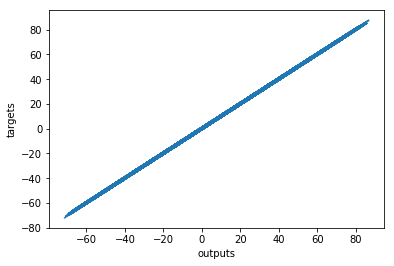

In [9]:
plt.plot(outputs,targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()